1. Problem identification
2. Business Understanding
3. Collection Data
4. Pre_processing data
5. EDA (Exploratory Data Analysis)
6. Feature Engineering And selection
7. Model training , Evaluation ,selection  
8. Model Testing
  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

In [6]:
df = pd.read_csv('/content/insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# First Know our data Or Structures of the data

In [8]:
df.shape

(1338, 7)

**Conclusion:-**
- In our data, there are 7(including target(expenses) column) columns and 1338 rows.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Conclusions :-
- In our data, there are seven columns (age, sex, bmi, children, smoker, redion, expenses), and the data types of these columns are given above.
- Age, bmi, Children, expenses ---> Numerical columns
- sex, smoker, region ---> categorical columns

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Conclusion:-**
- There are no null values in our data.

In [10]:
df.describe()  # for the descriptive analysis of the dataset

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


# EDA (Exploratory Data Analysis)

Correlation between the numerical columns

In [12]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


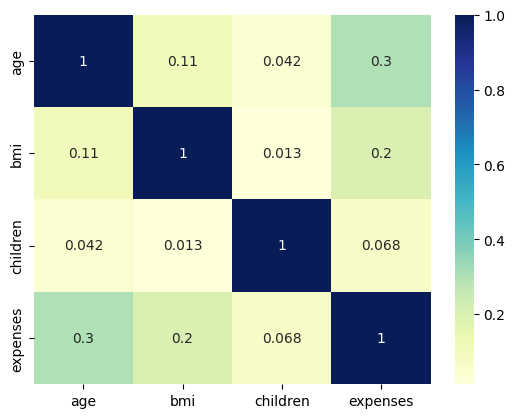

In [13]:
dataplot = sns.heatmap(df.iloc[:,[0,2,3,6]].corr(), cmap="YlGnBu", annot=True)

**Conclusion :-**
- Simply form the above table, and we say that the correlation coefficient between age and expenses is 0.3 and BMI vs. expenses is 0.2, which is high relative to others.

<Axes: ylabel='count'>

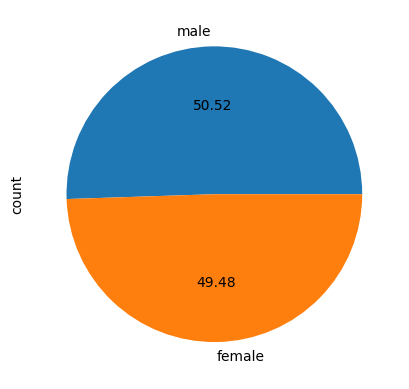

In [14]:
df['sex'].value_counts().plot(kind = 'pie',autopct='%.2f')

**Conclusion :-**
- In our data, there are 50.52% males and 49.48% females.


<Axes: ylabel='count'>

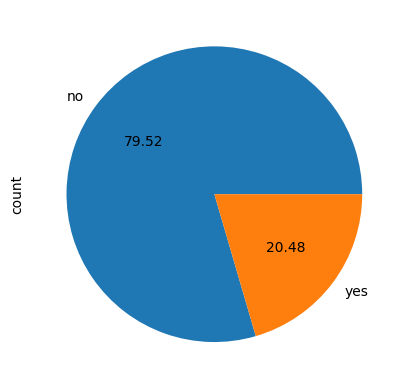

In [15]:
df['smoker'].value_counts(ascending=False).plot(kind = 'pie',autopct='%.2f')

**Conclusions:-**
- In our dataset, there are 79.52% of persons who are not smokers and 20.48% of persons who are smokers.

# Distribution of the features

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

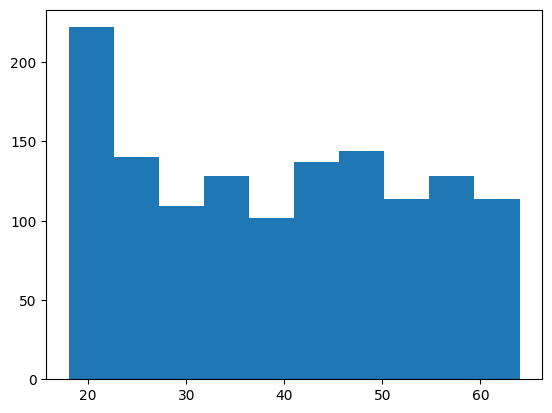

In [16]:
# histogram of age
df.age.mean()
import matplotlib.pyplot as plt
plt.hist(df["age"],bins = 10)

<ipython-input-17-46db0f070446>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


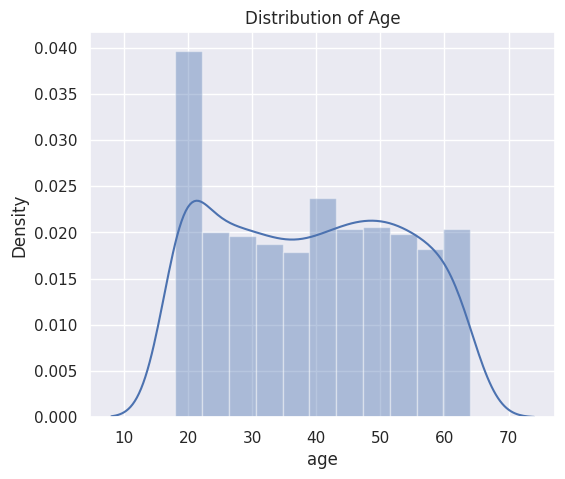

In [17]:

sns.set()
plt.figure(figsize = (6,5))
sns.distplot(df["age"])
plt.title("Distribution of Age")
plt.show()

<Axes: ylabel='age'>

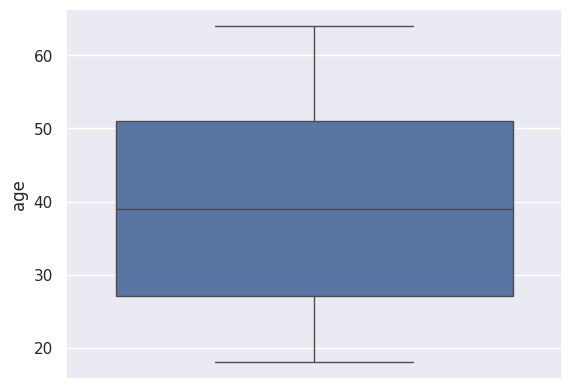

In [18]:
# Box-plot
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

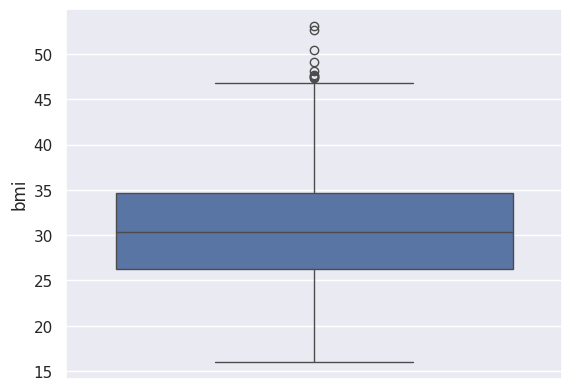

In [92]:
sns.boxplot(df['bmi'])

In [94]:
df[df['bmi'] > 47] # this is my outliers

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


<Axes: ylabel='children'>

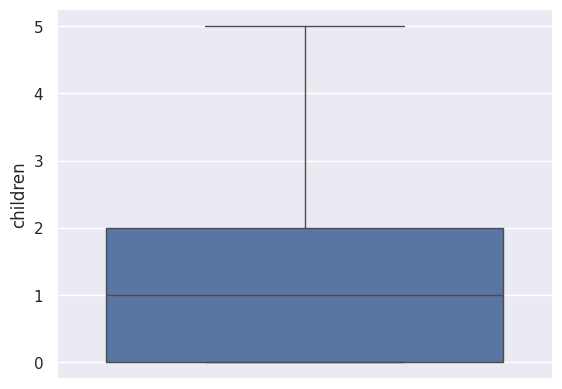

In [96]:
sns.boxplot(df['children'])

**Conclusion :-**
This boxplot graph show that
- There are no outlier in the Age column.
- There are some outlier in the bmi column.
- There are no outlier in the children column.

In [20]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-21-f860c9dc5637>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


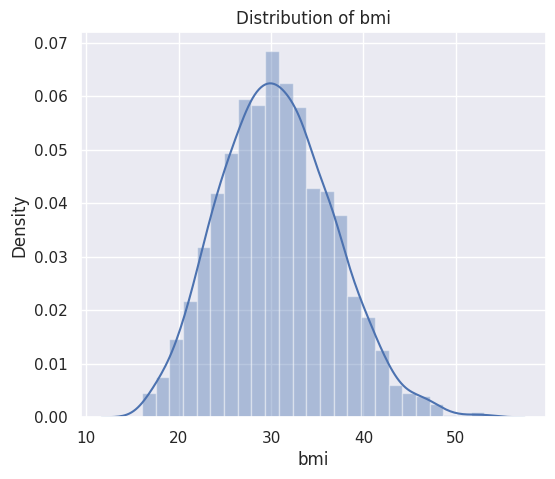

In [21]:
# for bmi
plt.figure(figsize = (6,5))
sns.distplot(df["bmi"])
plt.title("Distribution of bmi")
plt.show()

**Conclusion :-**
- The distribution of BMI is approximately normal

In [85]:
df['bmi'].skew()

0.28459296016731195

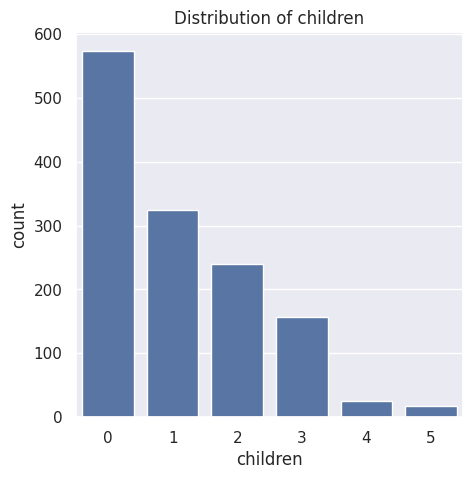

In [22]:
# for Children column
plt.figure(figsize = (5,5))
sns.countplot(x='children',data= df)

plt.title("Distribution of children")
plt.show()

In [23]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


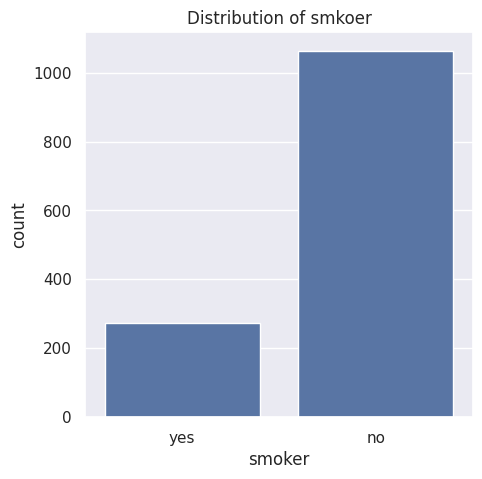

In [24]:
# for Children column
plt.figure(figsize = (5,5))
sns.countplot(x='smoker',data= df)

plt.title("Distribution of smkoer")
plt.show()

<Axes: xlabel='bmi', ylabel='age'>

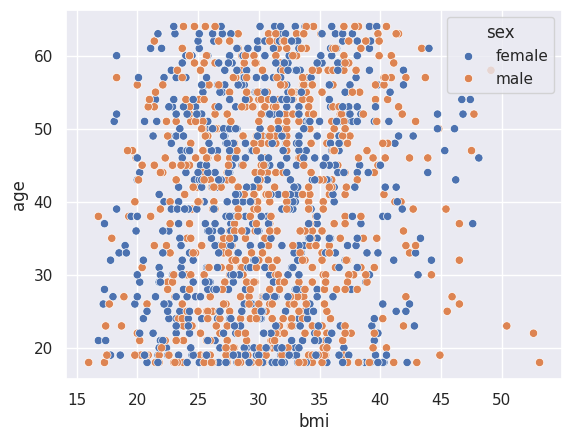

In [25]:
sns.scatterplot(x=df['bmi'],y=df['age'],hue=df['sex'])

In [26]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


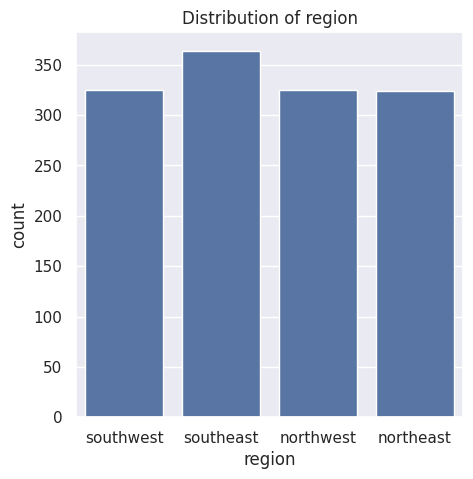

In [27]:
plt.figure(figsize = (5,5))
sns.countplot(x='region',data= df)

plt.title("Distribution of region")
plt.show()

In [28]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-29-87f1b0b3c8b5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'])


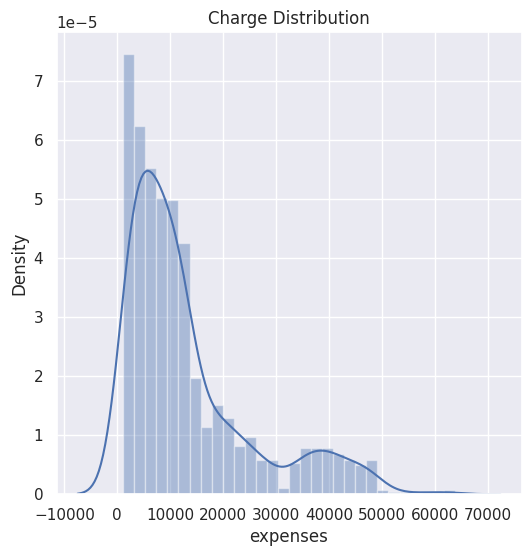

In [29]:

#distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df['expenses'])
plt.title('Charge Distribution')
plt.show()

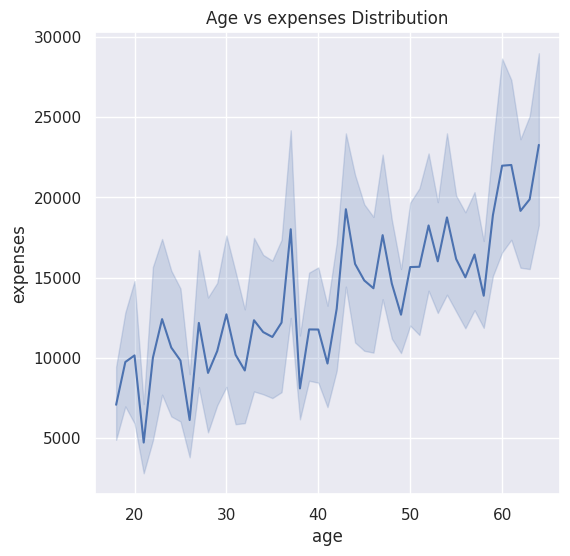

In [30]:
# Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='expenses',data= df)
plt.title('Age vs expenses Distribution')
plt.show()

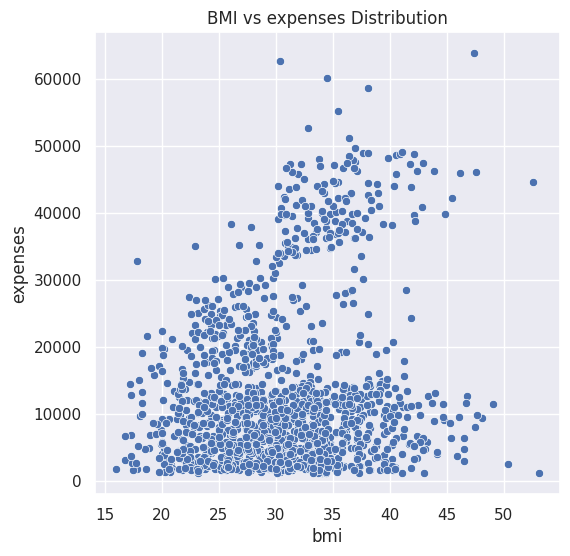

In [31]:
#Scatterplot for BMI and Charges
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='expenses',data= df)
plt.title('BMI vs expenses Distribution')
plt.show()

<ipython-input-32-7208c1aa135d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex',y='expenses',data= df , ci=None)


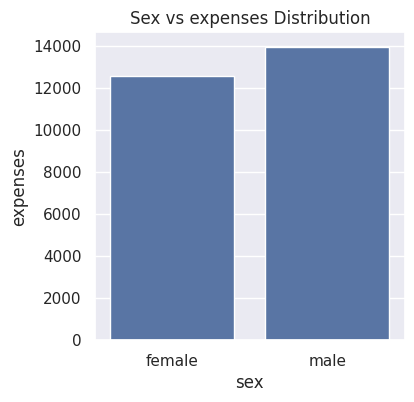

In [32]:
#Scatterplot for Sex and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='expenses',data= df , ci=None)
plt.title('Sex vs expenses Distribution')
plt.show()

<ipython-input-33-e0e701e6bfaf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='children',y='expenses',data= df , ci=None)


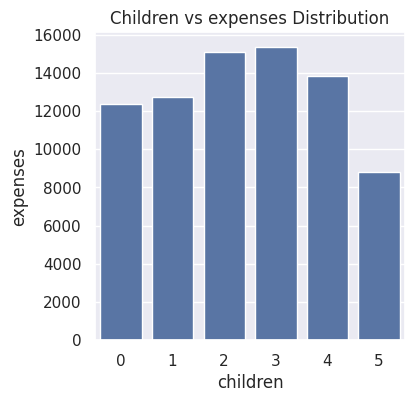

In [33]:
#Scatterplot for Children and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='expenses',data= df , ci=None)
plt.title('Children vs expenses Distribution')
plt.show()

<ipython-input-84-43179b7c445b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region',y='expenses',data= df , ci = None)


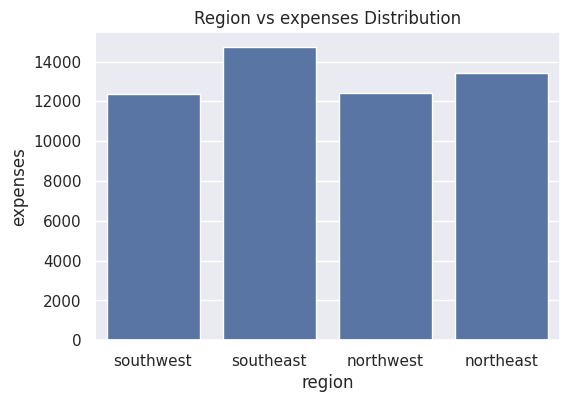

In [84]:
#Scatterplot for Region and Charges
plt.figure(figsize=(6,4))
sns.barplot(x='region',y='expenses',data= df , ci = None)
plt.title('Region vs expenses Distribution')
plt.show()

# Spliting the data into train dataset  and test dataset

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["expenses"]),df["expenses"],test_size = 0.2, random_state= 5)

In [36]:
X_train.shape , X_test.shape

((1070, 6), (268, 6))

# Feature Engineering

Encoding Categorical data into Numerical data

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe_sex = OneHotEncoder(sparse=False,handle_unknown="ignore")
ohe_smoker = OneHotEncoder(sparse=False,handle_unknown="ignore")
ohe_region= OneHotEncoder(sparse=False,handle_unknown="ignore")

In [39]:
X_train_sex = ohe_sex.fit_transform(X_train[['sex']])
X_train_smoker = ohe_smoker.fit_transform(X_train[['smoker']])
X_train_region = ohe_region.fit_transform(X_train[['region']])

X_test_sex = ohe_sex.fit_transform(X_test[['sex']])
X_test_smoker = ohe_smoker.fit_transform(X_test[['smoker']])
X_test_region = ohe_region.fit_transform(X_test[['region']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [83]:
X_train_region

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [41]:
X_train_rem = X_train.drop(columns=["sex",'smoker','region'])
X_test_rem = X_test.drop(columns=["sex",'smoker','region'])

In [43]:
X_train_t = np.concatenate((X_train_rem,X_train_sex,X_train_smoker,X_train_region),axis=1)
X_test_t = np.concatenate((X_test_rem,X_test_sex,X_test_smoker,X_test_region),axis=1)

In [44]:
X_train_t[0]

array([28. , 37.1,  1. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ])

In [45]:
df_new = pd.DataFrame(X_train_t,columns=["age","bmi",'children',"sex_male",'sex_female','smoker_no','smoker_yes',"region_northeast",'region_northwest','region_southeast','region_souhtwest'])

In [46]:
df_new.head()

,age,bmi,children,sex_male,sex_female,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_souhtwest
0,28.0,37.1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,24.0,24.2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,19.0,30.6,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,23.0,24.2,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,18.0,25.1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [47]:
X_train_t

array([[28. , 37.1,  1. , ...,  0. ,  0. ,  1. ],
       [24. , 24.2,  0. , ...,  1. ,  0. ,  0. ],
       [19. , 30.6,  0. , ...,  1. ,  0. ,  0. ],
       ...,
       [33. , 36.3,  3. , ...,  0. ,  0. ,  0. ],
       [59. , 26.4,  0. , ...,  0. ,  1. ,  0. ],
       [57. , 43.7,  1. , ...,  0. ,  0. ,  1. ]])

In [48]:
y_train

,expenses
1261,3277.16
816,2842.76
581,1639.56
1328,22395.74
492,2196.47
513,1256.30
1166,10982.50
207,20984.09
533,19214.71
354,14133.04


# Model training , Evaluation ,selection

Linear Rgression

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_t,y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test_t)

Lasso Rgression

In [51]:
from sklearn.linear_model import Lasso
las = Lasso(10)

In [52]:
las.fit(X_train_t,y_train)

Lasso(alpha=10)

In [53]:
y_pred1 = las.predict(X_test_t)

Ridge Rgression

In [54]:
from sklearn.linear_model import Ridge
rid = Ridge(0.1)
rid.fit(X_train_t,y_train)

Ridge(alpha=0.1)

In [55]:
y_pred2 = rid.predict(X_test_t)

In [56]:
print('The R squared value for the testing dataset using Linear Regression is : ',r2_score(y_test,y_pred))
print('The R squared value for the testing dataset using Lasso Regression is  : ',r2_score(y_test,y_pred1))
print('The R squared value for the testing dataset using Ridge regression is   : ',r2_score(y_test,y_pred1))

The R squared value for the testing dataset using Linear Regression is :  0.7781282745920679
The R squared value for the testing dataset using Lasso Regression is  :  0.7781672528351491
The R squared value for the testing dataset using Ridge regression is   :  0.7781672528351491


# Testing phase

In [57]:
test_input = np.array([31, 'female',25.74, 0, 'no', 'southeast'],dtype=object).reshape(1,6)

In [58]:
test_input

array([[31, 'female', 25.74, 0, 'no', 'southeast']], dtype=object)

In [59]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [60]:
test_input_sex

array([[1., 0.]])

In [61]:
test_input_smoker = ohe_smoker.transform(test_input[:,4].reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [62]:
test_input_smoker

array([[1., 0.]])

In [63]:
test_input_region = ohe_region.transform(test_input[:,-1].reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [64]:
test_input_region

array([[0., 0., 1., 0.]])

In [65]:
test_input_transformed = np.concatenate((test_input[:,[0,2,3]],test_input_sex,test_input_smoker,test_input_region),axis=1)

In [66]:
test_input_transformed.shape

(1, 11)

In [81]:
y_1 = lr.predict(test_input_transformed)
y_2 = las.predict(test_input_transformed)
y_3 = rid.predict(test_input_transformed)

In [82]:
print("Test_data output using Linear Regression is",y_1)
print("Test_data output using Lassp Regression is",y_2)
print("Test_data output using Ridge Regression is",y_3)

Test_data output using Linear Regression is [3817.84597293]
Test_data output using Lassp Regression is [3871.28417631]
Test_data output using Ridge Regression is [3819.59039399]
